In [2]:
# Import required libraries
%matplotlib inline
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from pytrends.request import TrendReq

In [3]:
# Setting up the routine
kw_list = ["how to breakup"]
pytrends = TrendReq(hl='en-US', tz=360)
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='', gprop='')

In [4]:
# Getting related queries
related_queries_dict = pytrends.related_queries()
print(related_queries_dict)

{'how to breakup': {'top':                                           query  value
0                       how to get over breakup    100
1                     how to get over a breakup     95
2                               how to break up     33
3                             how to do breakup     31
4                      how to deal with breakup     30
5                    how to deal with a breakup     24
6                                how to move on     16
7                   how to breakup with someone     14
8                 how to breakup with boyfriend     13
9                  how long to get over breakup     12
10               how long to get over a breakup     12
11               how to breakup with girlfriend     10
12                      how to overcome breakup     10
13                               breakup quotes      9
14                 how to move on after breakup      9
15               how to move on after a breakup      7
16                     how to cope wit

In [5]:
# Updating request with manually selected related query
kw_list = ["how to breakup", "how to cope with breakup"]
pytrends = TrendReq(hl='en-US', tz=360)
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='', gprop='')

In [6]:
# Interest Over Time
trends = pytrends.interest_over_time()
trendsTime = pytrends.get_historical_interest(
    kw_list, year_start=2018, month_start=1, day_start=1, hour_start=0,
    year_end=2018, month_end=2, day_end=1, hour_end=0, cat=0, geo='', gprop='',
    sleep=0
)

In [7]:
trendsTime

,how to breakup,how to cope with breakup,isPartial
date,,,
2018-01-01 00:00:00,54,0,False
2018-01-01 01:00:00,71,1,False
2018-01-01 02:00:00,60,2,False
2018-01-01 03:00:00,64,0,False
2018-01-01 04:00:00,49,0,False
2018-01-01 05:00:00,56,1,False
2018-01-01 06:00:00,77,0,False
2018-01-01 07:00:00,57,1,False
2018-01-01 08:00:00,54,1,False


,how to breakup,how to cope with breakup,isPartial,Total
date,,,,
2018-01-01 00:00:00,54,0,False,54
2018-01-01 01:00:00,71,1,False,72
2018-01-01 02:00:00,60,2,False,62
2018-01-01 03:00:00,64,0,False,64
2018-01-01 04:00:00,49,0,False,49


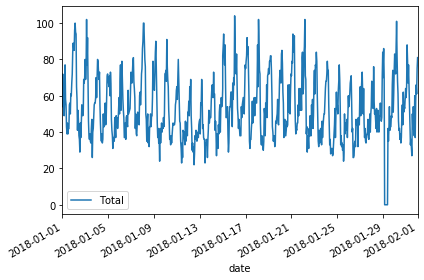

In [8]:
# Agreggating columns
trendsTime["Total"] = trendsTime["how to breakup"] + trendsTime["how to cope with breakup"]
trendsTime.plot(y=["Total"])
trendsTime.head()

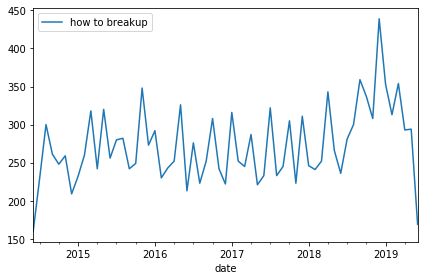

In [9]:
# Interest by Month
resample = trends.resample('M').sum()
resample.plot(y=["how to breakup"])

[]

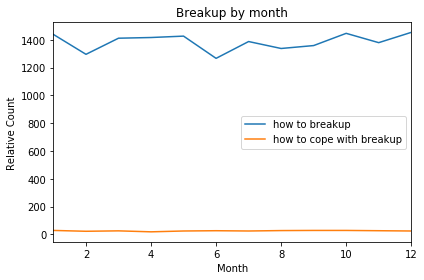

In [10]:
# Interest by Different Timescales
reshapedByMonth = trends.groupby([trends.index.month], as_index=True).sum()
ax = reshapedByMonth.plot(title='Breakup by month')
ax.set_xlabel("Month")
ax.set_ylabel("Relative Count")
plt.plot()

[]

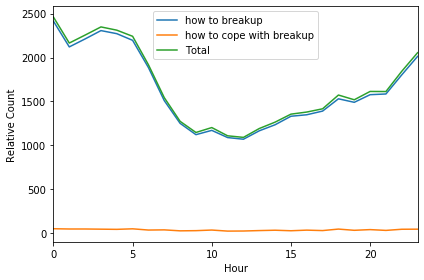

In [11]:
reshapedByArbitrary = trendsTime.groupby([trendsTime.index.hour], as_index=True).sum()
ax = reshapedByArbitrary.plot()
ax.set_xlabel("Hour")
ax.set_ylabel("Relative Count")
plt.plot()
#ax.get_figure().savefig('break.png',dpi=500)

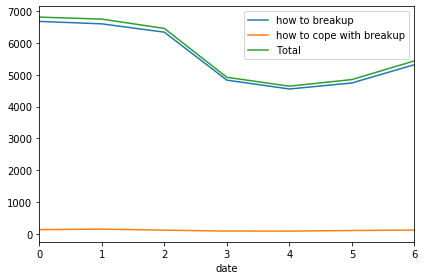

In [12]:
reshapedByArbitrary = trendsTime.groupby([trendsTime.index.dayofweek], as_index=True).sum()
reshapedByArbitrary.plot()

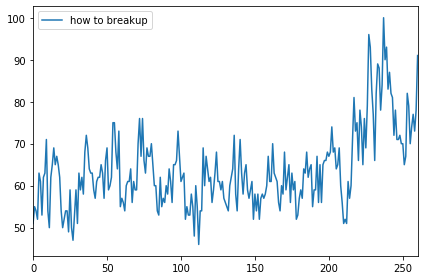

In [13]:
# Adding the index as a column
trends.reset_index(level=0, inplace=True)
trends.head()
trends["date"] = pd.to_datetime(trends["date"])
trends.groupby([trends.date.dt.year, trends.date.dt.month]).agg('count')
trends.plot(y =['how to breakup'])

In [14]:
help(pd.merge)

Help on function merge in module pandas.core.reshape.merge:

merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)
    Merge DataFrame or named Series objects with a database-style join.
    
    The join is done on columns or indexes. If joining columns on
    columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
    on indexes or indexes on a column or columns, the index will be passed on.
    
    Parameters
    ----------
    left : DataFrame
    right : DataFrame or named Series
        Object to merge with.
    how : {'left', 'right', 'outer', 'inner'}, default 'inner'
        Type of merge to be performed.
    
        * left: use only keys from left frame, similar to a SQL left outer join;
          preserve key order.
        * right: use only keys from right frame, similar to a SQL right outer join;
          preserve key 